# High-Tech exports as % of manufactured exports

In [14]:
import matplotlib.pyplot as plt
from pandas_datareader import wb
import pandas as pd
import statsmodels.formula.api as smf
from src.utils import apply_matplotlib_settings

apply_matplotlib_settings()

In [13]:
search1 = wb.search("high-tech exports")
search2 = wb.search("high-technology exports")
search = pd.concat([search1, search2])
search

,id,name,unit,source,sourceNote,sourceOrganization,topics
18174,TX.MNF.TECH.ZS.UN,Medium and high-tech exports (% manufactured e...,,World Development Indicators,Share of medium and high-tech manufactured exp...,b'United Nations Industrial Development Organi...,Private Sector ; Trade
18260,TX.VAL.TECH.CD,High-technology exports (current US$),,World Development Indicators,High-technology exports are products with high...,"b'United Nations, Comtrade database through th...",Private Sector ; Science & Technology ; Trade
18261,TX.VAL.TECH.MANF.ZS,High-technology exports (% of manufactured exp...,,WDI Database Archives,,b'',
18262,TX.VAL.TECH.MF.ZS,High-technology exports (% of manufactured exp...,,World Development Indicators,High-technology exports are products with high...,"b'United Nations, Comtrade database through th...",Private Sector ; Science & Technology ; Trade


In [45]:
raw = wb.download(
    indicator=["TX.VAL.TECH.MF.ZS", "TX.VAL.TECH.CD"],
    country="all",
    start=2013,
    end=2022,
)
# Rename columns
column_names = dict(zip(raw.columns, ["ht_%me", "ht_usd"]))
raw = raw.rename(columns=column_names)
# Adjust index types
index_dtypes = [str, int]
for level, dtype in enumerate(index_dtypes):
    raw.index = raw.index.set_levels(
        raw.index.levels[level].astype(dtype), level=level
    )
# Alter column types
raw["ht_usd"] = raw["ht_usd"].fillna(-1).astype("int")
raw

ht_%me      ht_usd
country                     year                      
Africa Eastern and Southern 2022  6.497370  2753289412
                            2021  5.324971  2652601087
                            2020  6.289310  2135145666
                            2019  6.978050  2216235025
                            2018  6.828031  2615578992
...                                    ...         ...
Zimbabwe                    2017  2.585869    11180300
                            2016  5.164383    13725165
                            2015  3.276828    11810010
                            2014  1.461771    12120906
                            2013  2.939574    18935955

[2660 rows x 2 columns]

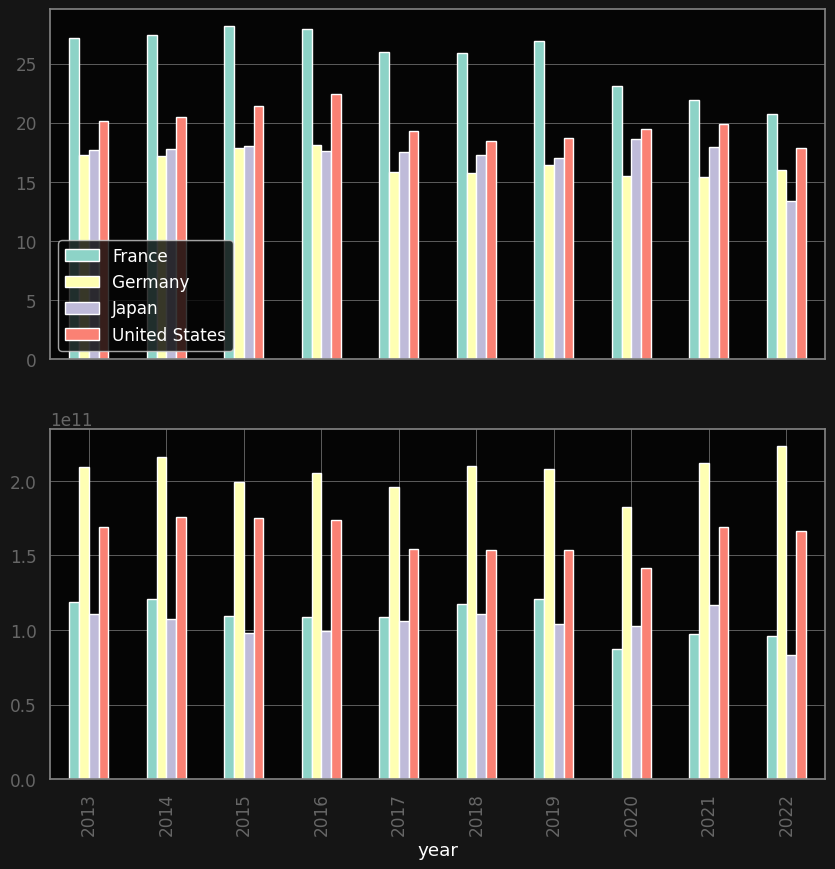

In [111]:
fig, ax = plt.subplots(2, 1)
countries = (
    raw.filter(regex="United States|France|Germany|Japan", axis=0)
    .dropna()
    .swaplevel()
)
countries.unstack()["ht_%me"].plot(kind="bar", ax=ax[0])
countries.unstack()["ht_usd"].plot(kind="bar", ax=ax[1])
ax[0].legend(loc="lower left")
ax[0].get_xaxis().set_visible(False)
ax[1].legend().remove()
fig.set_figheight(10)
fig.show()